In [1]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,19129.000000,19129.000000,19129.000000,19129.000000,19129.000000,19129.000000,19129.000000,19129.000000,19129.000000,19129.000000,19129.000000
mean,869.031314,212.431282,213.533286,377.047101,196.268859,260.531285,2.073866,35.495426,18.404151,22.605794,2.222714
std,962.423313,325.977085,326.180058,552.513550,292.917878,400.164692,1.369946,46.257000,13.515165,16.018336,7.426737
min,25.000000,9.000000,9.000267,9.000000,6.000000,9.101900,0.250000,-26.000000,0.000000,0.000000,-1.857143
25%,149.000000,22.000000,23.086633,50.000000,26.000000,29.089500,1.597285,20.000000,11.000000,11.951900,1.350000
50%,402.000000,54.000000,55.362397,119.000000,59.000000,71.873800,1.852890,29.000000,17.000000,23.443200,1.687500
75%,1352.000000,242.000000,242.666012,438.000000,220.000000,291.838300,2.206897,40.000000,22.000000,27.642600,2.250000
max,3560.000000,1722.000000,1722.009755,3276.000000,1611.000000,2191.166400,77.387097,2297.000000,469.000000,635.119600,574.250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19130 entries, 0 to 19129
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            19130 non-null  object 
 1   trip_creation_time              19130 non-null  object 
 2   route_schedule_uuid             19130 non-null  object 
 3   route_type                      19130 non-null  object 
 4   trip_uuid                       19130 non-null  object 
 5   source_center                   19130 non-null  object 
 6   source_name                     19069 non-null  object 
 7   destination_center              19129 non-null  object 
 8   destination_name                19087 non-null  object 
 9   od_start_time                   19129 non-null  object 
 10  od_end_time                     19129 non-null  object 
 11  start_scan_to_end_scan          19129 non-null  float64
 12  is_cutoff                       

In [12]:
df.isnull().sum().sort_values(ascending=False)[:10]

,0
source_name,61
destination_name,43
is_cutoff,1
cutoff_factor,1
segment_osrm_distance,1
segment_osrm_time,1
segment_actual_time,1
factor,1
osrm_distance,1
osrm_time,1


The dataset contains null values in 'source_name' and 'destination_name' features.

In [13]:
# Removing null values

df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [17]:
# Converting the data type to datetime
df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])

Grouping by sub-journey in the trip

In [21]:
df['segment_key']=df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time'].transform('cumsum')
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance'].transform('cumsum')
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time'].transform('cumsum')

Aggregating at sub-journey level

In [22]:
segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

Grouping mini-trips, sorting by time

In [26]:
segment = df.groupby('segment_key').agg(segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671191949943656IND487001AABIND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487001AAB,Narsinghpur_KndliDPP_D (Madhya Pradesh),IND487551AAA,...,2018-09-12 04:33:09.726898,2018-09-12 05:59:13.062416,86.0,42.630333,78.0,42.0,48.4129,78.0,48.4129,41.0
1,1,trip-153671191949943656IND487551AAAIND464668AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487551AAA,Gadarwara_MPward_D (Madhya Pradesh),IND464668AAA,...,2018-09-12 05:59:13.062416,2018-09-12 09:23:49.463096,204.0,57.345262,175.0,63.0,76.0934,174.0,92.1494,91.0
2,2,trip-153671237597058150IND785690AABIND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,...,2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,39.495954,241.0,33.0,46.9087,240.0,56.7577,49.0
3,3,trip-153671262893947351IND500055AACIND501401AAC,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND501401AAC,...,2018-09-12 01:05:52.573005,2018-09-12 02:05:34.840021,59.0,14.859201,30.0,12.0,16.0049,30.0,16.0049,12.0
4,4,trip-153671262893947351IND501401AACIND500010AAA,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,IND501401AAC,Medchal_MROoffce_D (Telangana),IND500010AAA,...,2018-09-12 02:05:34.840021,2018-09-12 05:35:54.020732,210.0,9.499885,165.0,14.0,14.4597,165.0,14.4597,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,3633,trip-153861089872028474IND602024AAAIND602001AAA,test,2018-10-03 23:54:58.720536,thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...,Carting,trip-153861089872028474,IND602024AAA,Chennai_Vepmpttu_DC (Tamil Nadu),IND602001AAA,...,2018-10-04 02:03:42.668131,2018-10-04 02:57:23.720337,53.0,14.805108,30.0,10.0,15.5366,29.0,15.5367,10.0
3634,3634,trip-153861106442901555IND208006AAAIND209304AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND209304AAA,...,2018-10-04 02:51:27.075797,2018-10-04 06:59:51.621332,248.0,19.349008,190.0,24.0,30.0545,190.0,35.4369,36.0
3635,3635,trip-153861106442901555IND209304AAAIND208006AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND208006AAA,...,2018-10-03 23:57:44.429324,2018-10-04 02:51:27.075797,173.0,19.335831,92.0,24.0,28.8492,91.0,69.4497,52.0
3636,3636,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [27]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           3638 non-null   int64         
 1   segment_key                     3638 non-null   object        
 2   data                            3638 non-null   object        
 3   trip_creation_time              3638 non-null   object        
 4   route_schedule_uuid             3638 non-null   object        
 5   route_type                      3638 non-null   object        
 6   trip_uuid                       3638 non-null   object        
 7   source_center                   3638 non-null   object        
 8   source_name                     3638 non-null   object        
 9   destination_center              3638 non-null   object        
 10  destination_name                3638 non-null   object        
 11  od_s

# Calculating time taken between od_start_time and od_end_time

In [28]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,86.055592
1,204.606678
2,252.076999
3,59.704450
4,210.319679
...,...
3633,53.684203
3634,248.409092
3635,173.710775
3636,287.474007


In [29]:
trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [31]:
trip = segment.groupby('trip_uuid').agg(trip_dict).reset_index(drop = True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,IND487001AAB,Narsinghpur_KndliDPP_D (Madhya Pradesh),IND464668AAA,Bareli_SourvDPP_D (Madhya Pradesh),290.0,290.662270,99.975595,253.0,105.0,124.5063,252.0,140.5623,132.0
1,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),252.0,252.076999,39.495954,241.0,33.0,46.9087,240.0,56.7577,49.0
2,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND500010AAA,Hyderabad_Alwal_I (Telangana),269.0,270.024129,24.359086,195.0,26.0,30.4646,195.0,30.4646,26.0
3,training,2018-09-12 00:39:30.747127,thanos::sroute:42969f47-47af-4473-9f2c-cf747fe...,FTL,trip-153671277074687197,IND624001AAA,Dindigul_Central_D_1 (Tamil Nadu),IND624601AAA,Palani_RjndraRd_D (Tamil Nadu),410.0,413.394632,129.158279,301.0,329.0,197.6186,299.0,198.9714,329.0
4,training,2018-09-12 00:46:48.079257,thanos::sroute:8c5ab716-198a-4395-b83f-5672773...,Carting,trip-153671320807895983,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,FBD_Balabhgarh_DPC (Haryana),259.0,260.435888,76.231506,145.0,57.0,79.9793,142.0,80.1495,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,test,2018-10-03 23:33:29.015349,thanos::sroute:a02b2c7d-49c4-4c7f-956e-b4b22a1...,Carting,trip-153860960901509071,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),148.0,148.172525,49.732416,128.0,41.0,57.1276,127.0,67.7456,47.0
2002,test,2018-10-03 23:45:48.025062,thanos::sroute:1396edcd-faad-4029-a574-f71a85a...,Carting,trip-153861034802474617,IND245101AAA,Hapur_Swargash_D (Uttar Pradesh),IND201007AAA,GZB_Mohan_Nagar_DPC (Uttar Pradesh),148.0,148.794718,44.106290,123.0,50.0,46.5093,121.0,48.5795,50.0
2003,test,2018-10-03 23:54:58.720536,thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...,Carting,trip-153861089872028474,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602001AAA,Chennai_Thiruvlr_DC (Tamil Nadu),181.0,182.416663,27.010926,62.0,28.0,38.2867,61.0,33.6400,33.0
2004,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0


In [32]:
trip[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,99.975595,124.5063
1,39.495954,46.9087
2,24.359086,30.4646
3,129.158279,197.6186
4,76.231506,79.9793
...,...,...
2001,49.732416,57.1276
2002,44.106290,46.5093
2003,27.010926,38.2867
2004,38.684839,58.9037


Extracting City, Place, Code & State from Source and Destination names

In [33]:
def state(x):
  state=x.split('(')[1]
  return state[:-1]

def city(x):
  city=(x.split('(')[0]).split('_')[0]
  return city

def place(x):
  x=x.split('(')[0]
  if len(x.split('_'))>=3:
    place=x.split('_')[1]
  elif len(x.split('_'))==2:
    place=x.split('_')[0]
  else:
    place=x.split(" ")[0]
  return place

def code(x):
  x=x.split('(')[0]
  if len(x.split('_'))>=3:
    return x.split('_')[-1]
  return  "none"

In [34]:
df['source_state']=df['source_name'].apply(state)
df['source_city']=df['source_name'].apply(city)
df['source_place']=df['source_name'].apply(place)
df['source_code']=df['source_name'].apply(code)

df['destination_state']=df['destination_name'].apply(state)
df['destination_city']=df['destination_name'].apply(city)
df['destination_place']=df['destination_name'].apply(place)
df['destination_code']=df['destination_name'].apply(code)

**State with Most Number of Orders**


In [35]:
(df['source_state'].value_counts()).head()

,count
source_state,
Haryana,3897
Maharashtra,2654
Karnataka,2474
Tamil Nadu,1093
Telangana,898


In [36]:
(df['destination_state'].value_counts()).head()

,count
destination_state,
Maharashtra,2653
Karnataka,2611
Haryana,2575
Tamil Nadu,1136
Gujarat,1050


The source and destination state with most number of orders is Maharashtra

In [37]:
(df[(df['source_state']=="Maharashtra") & (df['destination_state']=="Maharashtra")]['source_city'].value_counts()).head()

,count
source_city,
Bhiwandi,336
Pune,299
Mumbai,182
Akola,109
Mumbai Hub,108


**The source city with most number of orders is Bhiwandi.**

In [38]:
(df[(df['source_state']=="Maharashtra") & (df['destination_state']=="Maharashtra") & (df['source_city']=="Bhiwandi")]["destination_city"].value_counts()).head()


,count
destination_city,
Mumbai,142
Akola,63
Mumbai Hub,61
Pune,60
Nashik,6


**The destination city with most number of orders is Mumbai.**

In [39]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [40]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
2001,2018,10,23,3,40,2
2002,2018,10,23,3,40,2
2003,2018,10,23,3,40,2
2004,2018,10,23,3,40,2


# Identifying outliers in numberical variable

<Axes: >

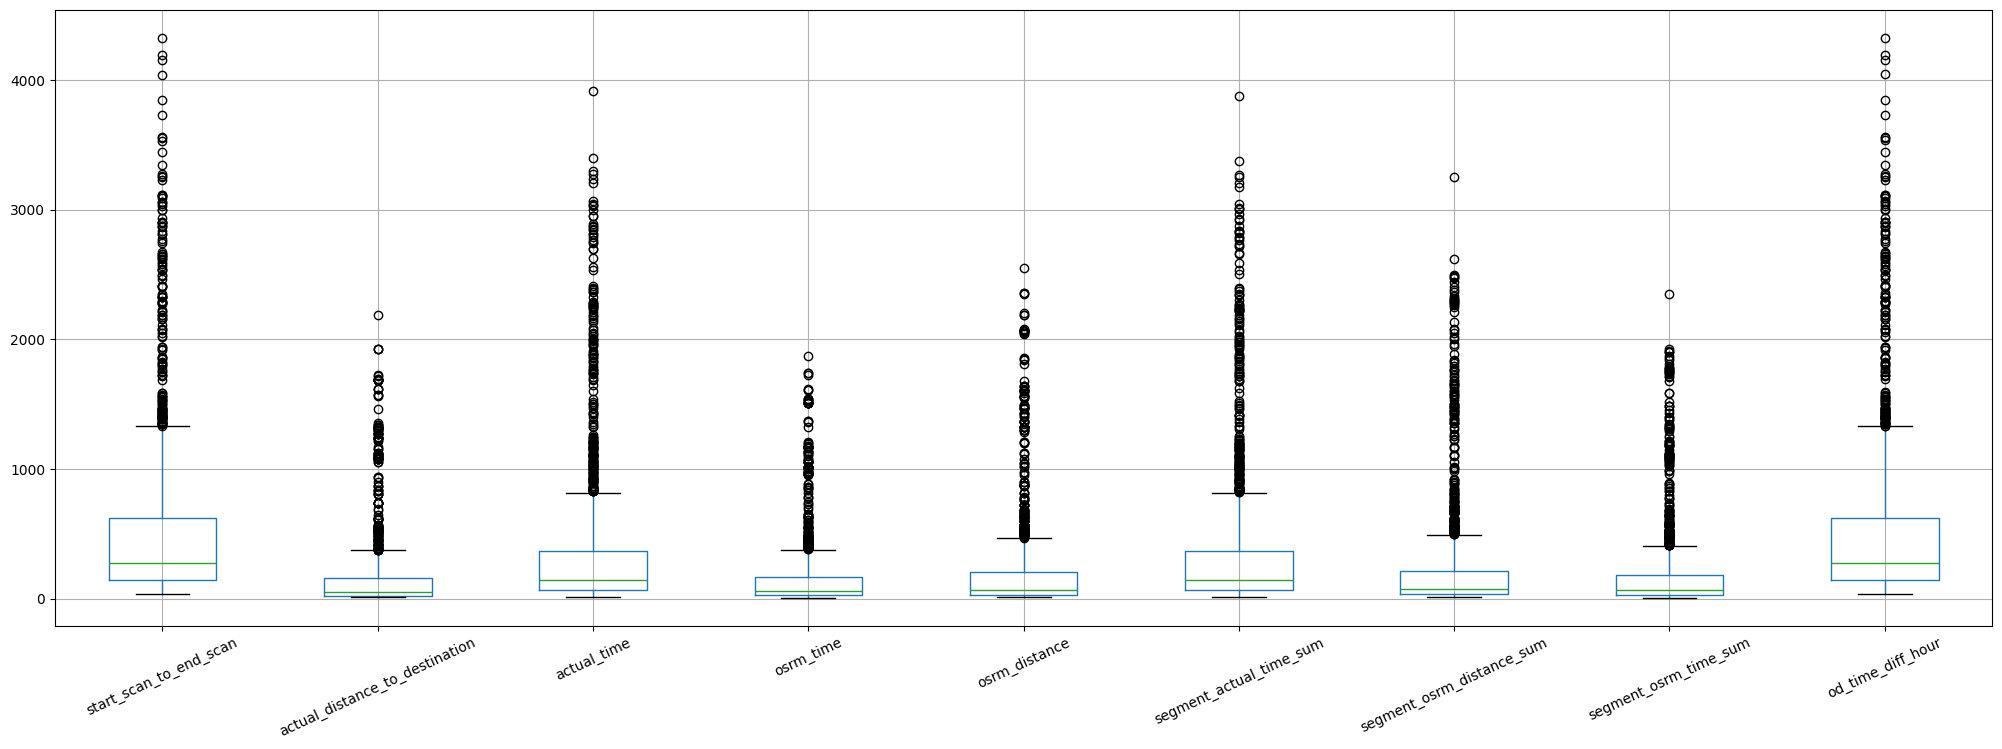

In [42]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']
trip[num_cols].boxplot(rot=25, figsize=(25,8))

**Outlier Handling using IQR**

In [43]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

<Axes: >

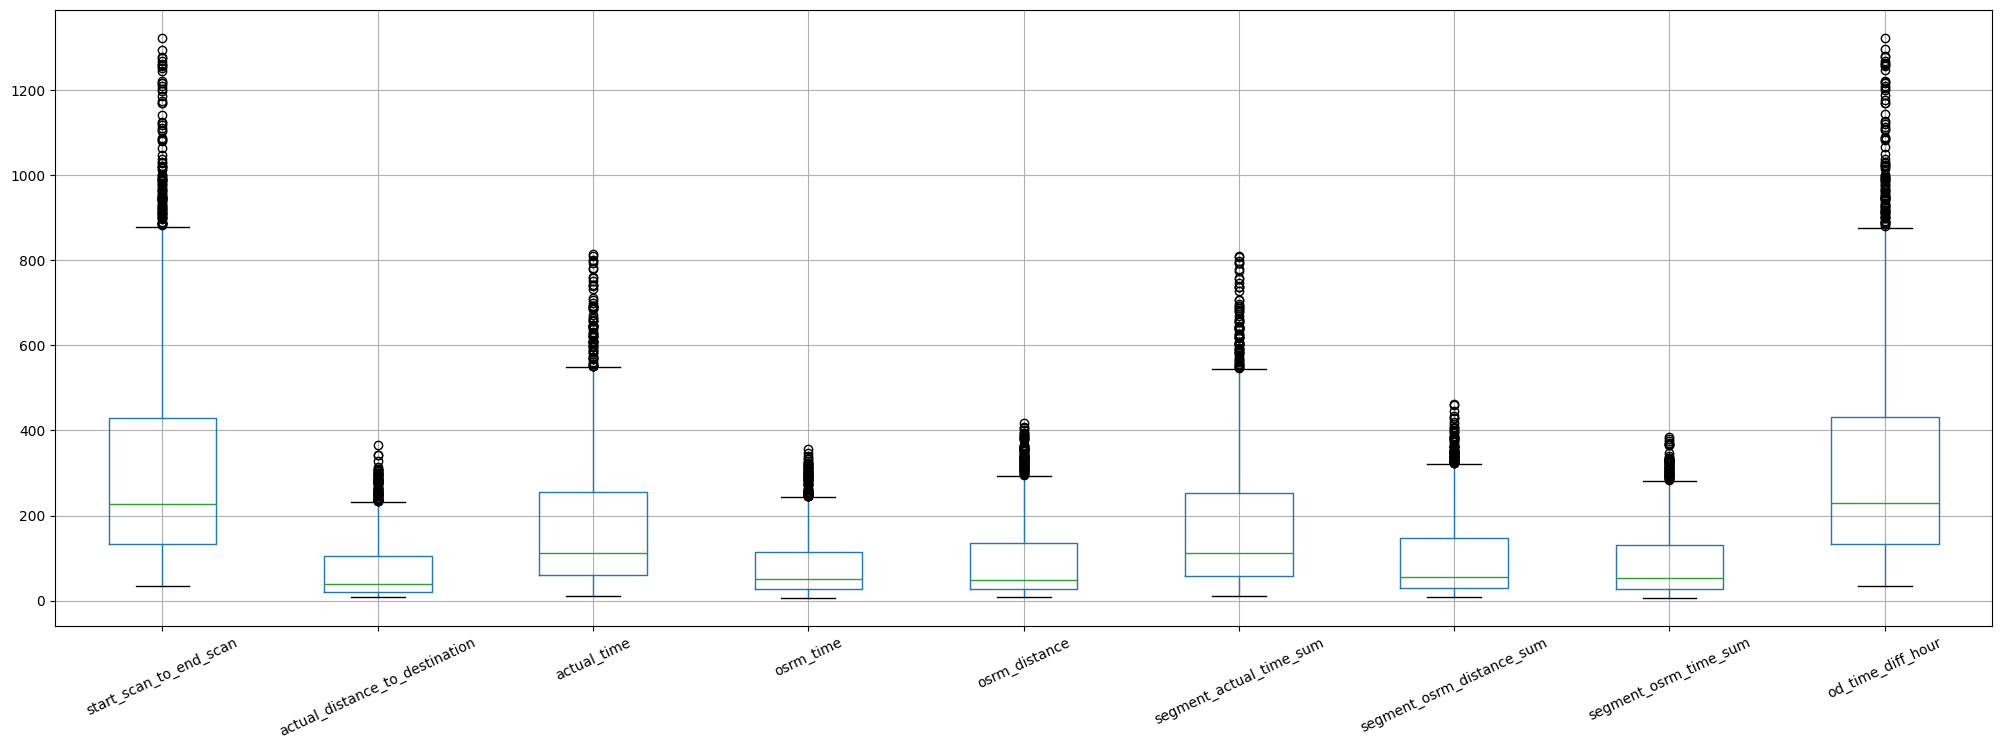

In [45]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

# Handling Categorical Variables

In [47]:
# As there are only two route_type, one hot encoding is preffered
trip['route_type'].value_counts()

,count
route_type,
Carting,1198
FTL,546


In [48]:
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

# Standardization of Numerical Features

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [51]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [52]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.116423,0.354040,0.451797,0.332877,0.340357,0.458438,0.423719,0.542485,-0.117053
1,-0.263444,-0.471556,0.378141,-0.638057,-0.513981,0.384329,-0.450601,-0.479706,-0.266140
2,-0.197672,-0.678186,0.095794,-0.732453,-0.695028,0.106421,-0.724913,-0.762964,-0.196795
3,0.347857,0.752407,0.746421,3.353561,1.145313,0.748696,1.033092,2.968649,0.357164
4,-0.236361,0.029914,-0.211106,-0.314412,-0.149878,-0.220892,-0.206558,-0.405813,-0.233843
...,...,...,...,...,...,...,...,...,...
1739,-0.665820,-0.331820,-0.315452,-0.530175,-0.401472,-0.313528,-0.335966,-0.504338,-0.667609
1740,-0.665820,-0.408621,-0.346142,-0.408809,-0.518378,-0.350582,-0.535923,-0.467391,-0.665205
1741,-0.538143,-0.641986,-0.720560,-0.705483,-0.608908,-0.721125,-0.691784,-0.676755,-0.535295
1742,0.390416,-0.482628,0.629799,-0.435779,-0.381918,0.637533,0.051520,0.000600,0.390876


#Recommendations:
There is a notable disparity between OSRM parameters and actual metrics.

**1. Action Points:**

Review the data inputs provided to the routing engine for trip planning.
Investigate any discrepancies with transporters and ensure the routing engine is optimized for accurate results.

**2. Regional Presence Analysis:**

North, South, and West zones experience high order volumes, whereas the Central, Eastern, and North-Eastern zones have comparatively lower activity. While this observation is based on only two months of data and requires further validation, it is worth exploring opportunities to expand operations in these regions.

**3. State-Level Insights:**

Maharashtra leads in traffic volume, followed by Karnataka, making these states key focus areas for resource planning. This is especially critical during festive seasons to ensure smooth operations.